In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [30]:
data = pd.read_excel('data_mag_rad.xls')
data

,Team,point,y,x,hight,Igamma,data
0,1.0,1,44.791111,33.993889,305,6.0,48836
1,NaN,2,44.791389,33.994444,307,4.0,48832
2,NaN,3,44.791389,33.995278,313,3.5,48852
3,NaN,4,44.791389,33.995833,317,4.0,48870
4,NaN,5,44.791667,33.996389,324,3.0,48885
5,NaN,6,44.791944,33.997222,331,3.5,48944
6,NaN,7,44.791667,33.998056,330,4.0,49010
7,NaN,8,44.791944,33.998611,331,4.0,49008
8,NaN,9,44.791944,33.999167,327,4.5,49010
9,NaN,10,44.792222,34.000000,340,4.0,49056


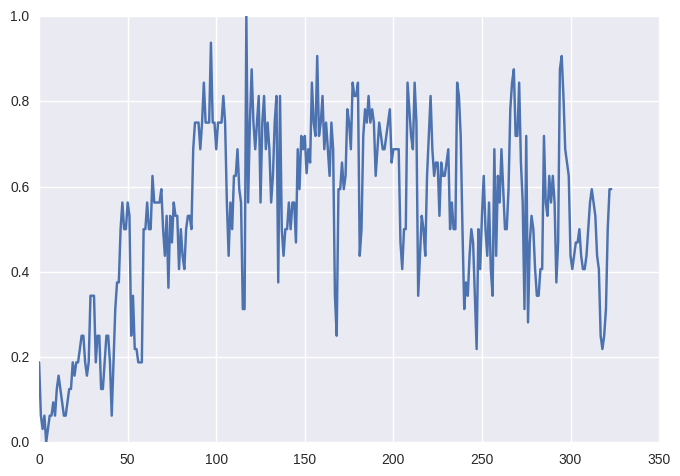

In [39]:
y = data.Igamma

min_y = min(y)
y = map(lambda i: i-min_y,y)
max_y = max(y)
y = map(lambda i: float(i)/max_y, y)
plt.plot(y)
#plt.plot(x)
plt.show()


In [63]:
step = 7 
def normalize(list_data):
    minimum = min(list_data)
    maximum = max(list_data)
    return map(lambda i: float(maximum-i)/(maximum-minimum),list_data)

def sin_normalize(list_data):
    return map(lambda i: np.sin(i), list_data)

def move_window(list_data, current_possition, step):
    return list_data[current_possition:current_possition+step]

def define_correlation(list_data1,list_data2):
    list_coeff = []
    for i in range(len(list_data1)/step):
        temp_1 = move_window(list_data1,i,step)
        temp_2 = move_window(list_data2,i,step)
        list_coeff.append(np.corrcoef(temp_1,temp_2)[0][1])
    plt.plot(range(0,len(list_data1)-step, step), list_coeff, 'r-')
    plt.plot(range(len(list_data1)), list_data1, 'b-')
    plt.plot(range(len(list_data2)), list_data2, 'g-')
    plt.plot(range(len(list_data2)), [0 for x in list_data1], 'r--')
    plt.axis([0,350,-2,2])

In [64]:
data1 = sin_normalize(data.Igamma)
data2 = sin_normalize(data.data)
define_correlation(data1,data2)

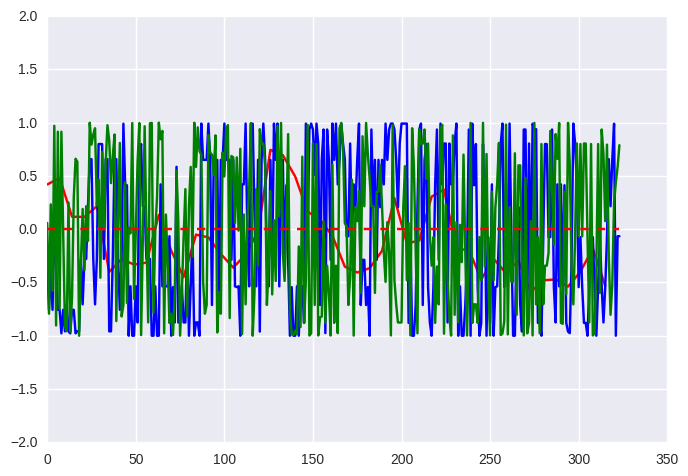

In [65]:
plt.figure(figsize=(20,5))
plt.show()